Team :
krishnateja.k2@gmail.com
amar.r.naik@gmail.com
shankar.uday007@gmail.com
prasad.shripathi@gmail.com

# 1. Import Libraries

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision
import sys
import matplotlib.pyplot as plt
import numpy as np
import random
# from torch_receptive_field import PytorchReceptiveField

!pip install torchsummary

# from receptivefield.image import get_default_image
# from torch_receptive_field import receptive_field

# 2. Mount Google Drive to get the files individual files

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!rm -rf '/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-RESNET/__pycache__'
!ls -lrt '/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-RESNET/'

total 2109
-rw------- 1 root root    4771 Mar 10 20:30 dataTorchTransformLoad.py
-rw------- 1 root root    3807 Mar 10 20:30 trainModel.py
-rw------- 1 root root    2488 Mar 10 20:30 testModel.py
-rw------- 1 root root    3734 Mar 10 20:30 Resnet.py
-rw------- 1 root root 2143406 Mar 10 20:36 EVA4_S8_CIFAR10.ipynb


## 2.1 Add Googledrive path to the systempath  

In [0]:
sys.path.append('/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-RESNET/')

# 3. Import custom functions and classes

 1. dataTorchTransformLoad
 2. customDeepCNN
 3. trainModel (params for regularization and misclassification plots)
 4. testModel (params for regularization and misclassification plots)


In [0]:
import dataTorchTransformLoad as dtl
import Resnet as resnet
import trainModel
import testModel

In [0]:
# !cat '/content/drive/My Drive/Colab Notebooks/EVA4/S7 - CIFAR10-Structure/testModel.py'

# 4. Train - Test Data Load with torch transforms

In [0]:
train,test,train_loader,test_loader = dtl.data_transform_and_load_function('CIFAR10',64)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


## 4.1 Data Statistics

In [0]:
train_transform = transforms.Compose([transforms.ToTensor()])
train_set = torchvision.datasets.CIFAR10('./data', train=True, download=True, transform=train_transform)
    #print(vars(train_set))
print("Shape : ", train_set.data.shape)
print("Mean : ",train_set.data.mean(axis=(0,1,2))/255)
print("Std : ",train_set.data.std(axis=(0,1,2))/255)
print("Min : ",train_set.data.min(axis=(0,1,2))/255)
print("Max : ",train_set.data.max(axis=(0,1,2))/255)

Files already downloaded and verified
Shape :  (50000, 32, 32, 3)
Mean :  [0.49139968 0.48215841 0.44653091]
Std :  [0.24703223 0.24348513 0.26158784]
Min :  [0. 0. 0.]
Max :  [1. 1. 1.]


## 4.2 Display data

[['plane' 'dog' 'deer' 'deer' 'truck' 'cat' 'truck' 'truck']
 ['cat' 'cat' 'plane' 'horse' 'plane' 'dog' 'dog' 'deer']
 ['car' 'car' 'frog' 'car' 'frog' 'dog' 'ship' 'cat']
 ['car' 'frog' 'deer' 'bird' 'deer' 'bird' 'cat' 'horse']
 ['car' 'cat' 'cat' 'ship' 'horse' 'plane' 'plane' 'plane']
 ['truck' 'plane' 'frog' 'horse' 'ship' 'deer' 'bird' 'plane']
 ['cat' 'dog' 'bird' 'truck' 'dog' 'cat' 'deer' 'dog']
 ['dog' 'frog' 'horse' 'frog' 'ship' 'deer' 'plane' 'truck']]


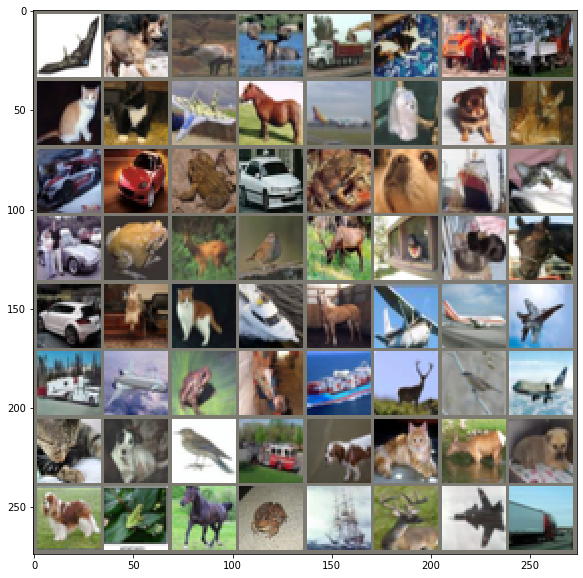

In [0]:
# functions to show an image
def imageshow(img):
    # img = img / 2 + 0.5      #unnormalize
    img[0] = img[0]*0.24703223 + 0.49139968
    img[1] = img[1]*0.24348513 + 0.48215841
    img[2] = img[2]*0.26158784 + 0.44653091
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

random.seed(1)
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
random.seed(1)
imageshow(torchvision.utils.make_grid(images))
# print labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(64)))
print(np.array([classes[labels[j]] for j in range(64)]).reshape(8,8))

# 5. Load Model and print ModelSummary

In [0]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = resnet.ResNet18().to(device)
# model = Net(3).to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-RESNET/Resnet.py:89: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


# 6. Run Models

## 6.1 Normal Run - No Regularization

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 0


/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-RESNET/Resnet.py:89: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=2.742418050765991 Batch_id=0 Accuracy=10.94:   0%|          | 0/782 [00:00<?, ?it/s]/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-RESNET/trainModel.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device).clone().detach().requires_grad_(True)
Loss=0.5720672607421875 Batch_id=781 Accuracy=53.06: 100%|██████████| 782/782 [01:00<00:00, 12.83it/s]
/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-RESNET/testModel.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clon


Test set: Average loss: 1.0046, Accuracy: 6471/10000 (64.71%)

EPOCH: 1


Loss=0.9375856518745422 Batch_id=781 Accuracy=73.39: 100%|██████████| 782/782 [01:01<00:00, 12.70it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7489, Accuracy: 7404/10000 (74.04%)

EPOCH: 2


Loss=0.6729814410209656 Batch_id=781 Accuracy=79.90: 100%|██████████| 782/782 [01:02<00:00, 12.59it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6073, Accuracy: 7878/10000 (78.78%)

EPOCH: 3


Loss=0.17983132600784302 Batch_id=781 Accuracy=84.04: 100%|██████████| 782/782 [01:02<00:00, 12.53it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6018, Accuracy: 8034/10000 (80.34%)

EPOCH: 4


Loss=0.7746856212615967 Batch_id=781 Accuracy=86.55: 100%|██████████| 782/782 [01:02<00:00, 12.57it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6108, Accuracy: 8072/10000 (80.72%)

EPOCH: 5


Loss=0.9145814180374146 Batch_id=781 Accuracy=88.67: 100%|██████████| 782/782 [01:02<00:00, 12.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4950, Accuracy: 8334/10000 (83.34%)

EPOCH: 6


Loss=0.19260065257549286 Batch_id=781 Accuracy=90.62: 100%|██████████| 782/782 [01:02<00:00, 12.43it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5097, Accuracy: 8350/10000 (83.50%)

EPOCH: 7


Loss=0.2943762540817261 Batch_id=781 Accuracy=95.48: 100%|██████████| 782/782 [01:03<00:00, 12.41it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3665, Accuracy: 8779/10000 (87.79%)

EPOCH: 8


Loss=0.3441826105117798 Batch_id=781 Accuracy=96.65: 100%|██████████| 782/782 [01:02<00:00, 12.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3642, Accuracy: 8825/10000 (88.25%)

EPOCH: 9


Loss=0.16873879730701447 Batch_id=781 Accuracy=97.29: 100%|██████████| 782/782 [01:02<00:00, 12.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3713, Accuracy: 8829/10000 (88.29%)

EPOCH: 10


Loss=0.13453246653079987 Batch_id=781 Accuracy=97.82: 100%|██████████| 782/782 [01:02<00:00, 12.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3772, Accuracy: 8827/10000 (88.27%)

EPOCH: 11


Loss=0.22172480821609497 Batch_id=781 Accuracy=98.37: 100%|██████████| 782/782 [01:02<00:00, 12.47it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3814, Accuracy: 8820/10000 (88.20%)

EPOCH: 12


Loss=0.01488921046257019 Batch_id=781 Accuracy=98.77: 100%|██████████| 782/782 [01:02<00:00, 12.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3816, Accuracy: 8823/10000 (88.23%)

EPOCH: 13


Loss=0.005009710788726807 Batch_id=781 Accuracy=98.87: 100%|██████████| 782/782 [01:02<00:00, 12.49it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3800, Accuracy: 8823/10000 (88.23%)

EPOCH: 14


Loss=0.048837512731552124 Batch_id=781 Accuracy=98.96: 100%|██████████| 782/782 [01:02<00:00, 12.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3854, Accuracy: 8850/10000 (88.50%)

EPOCH: 15


Loss=0.11005908250808716 Batch_id=781 Accuracy=98.99: 100%|██████████| 782/782 [01:02<00:00, 12.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3843, Accuracy: 8825/10000 (88.25%)

EPOCH: 16


Loss=0.15398919582366943 Batch_id=781 Accuracy=98.92: 100%|██████████| 782/782 [01:02<00:00, 12.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3832, Accuracy: 8841/10000 (88.41%)

EPOCH: 17


Loss=0.009617984294891357 Batch_id=781 Accuracy=98.90: 100%|██████████| 782/782 [01:02<00:00, 12.42it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3827, Accuracy: 8827/10000 (88.27%)

EPOCH: 18


Loss=0.05270397663116455 Batch_id=781 Accuracy=98.92: 100%|██████████| 782/782 [01:02<00:00, 12.42it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3852, Accuracy: 8831/10000 (88.31%)

EPOCH: 19


Loss=0.016208559274673462 Batch_id=781 Accuracy=98.98: 100%|██████████| 782/782 [01:02<00:00, 12.67it/s]



Test set: Average loss: 0.3825, Accuracy: 8842/10000 (88.42%)



Text(0.5, 1.0, 'Test Accuracy')

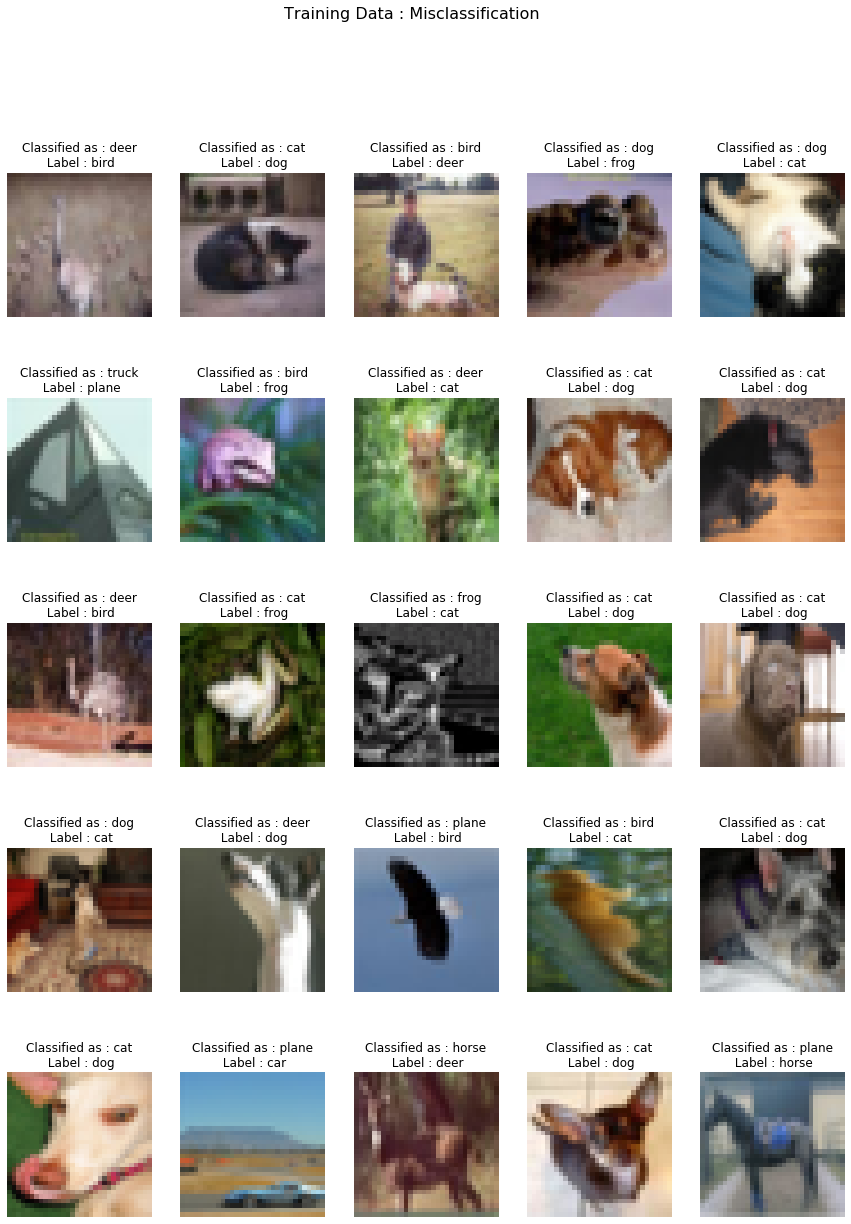

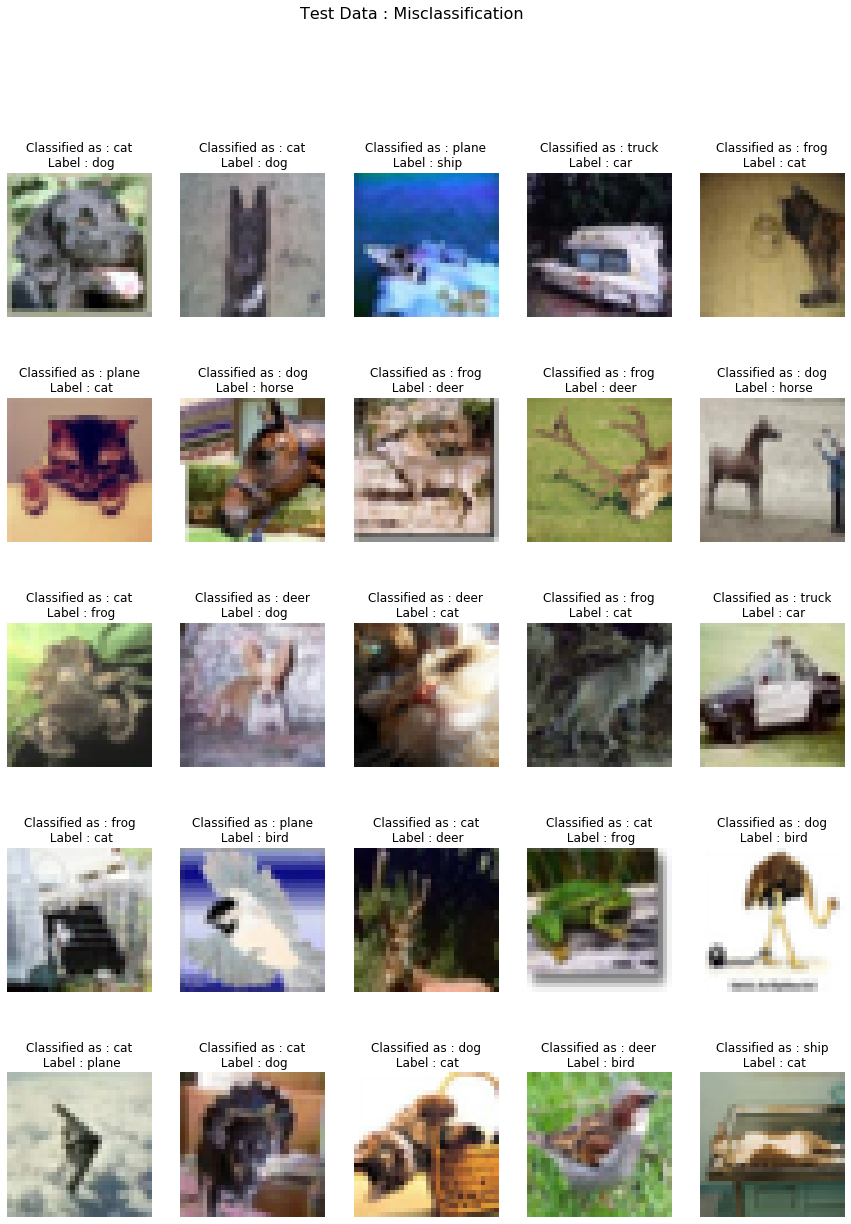

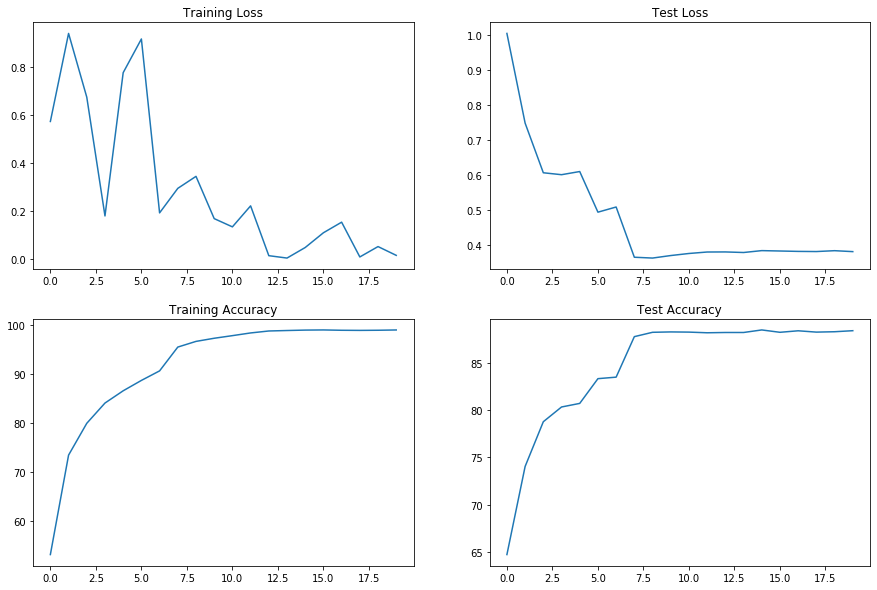

In [0]:
from torch.optim.lr_scheduler import StepLR,MultiStepLR
model = resnet.ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
scheduler = MultiStepLR(optimizer, milestones=[7, 12, 15, 18], gamma=0.1)
EPOCHS = 20
train_losses = []
train_acc = []
test_losses = []
test_acc = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    tr_acc,tr_losses = trainModel.train(model, device, train_loader, optimizer, epoch,'Normal', True, EPOCHS-1)
    train_losses.append(tr_losses)
    train_acc.append(tr_acc)
    scheduler.step()
    ts_acc,ts_loss = testModel.test(model, device, test_loader,epoch,'Normal',True, EPOCHS-1)
    test_losses.append(ts_loss)
    test_acc.append(ts_acc)    

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

## 6.2 Model with - L1 Regularization

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 0


/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-RESNET/Resnet.py:89: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=57.30039596557617 Batch_id=0 Accuracy=7.81:   0%|          | 0/782 [00:00<?, ?it/s]/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-RESNET/trainModel.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device).clone().detach().requires_grad_(True)
Loss=6.351623058319092 Batch_id=781 Accuracy=40.10: 100%|██████████| 782/782 [01:05<00:00, 11.90it/s]
/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-RESNET/testModel.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone(


Test set: Average loss: 2.0279, Accuracy: 2736/10000 (27.36%)

EPOCH: 1


Loss=4.95524787902832 Batch_id=781 Accuracy=45.99: 100%|██████████| 782/782 [01:05<00:00, 11.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6801, Accuracy: 4499/10000 (44.99%)

EPOCH: 2


Loss=4.835471153259277 Batch_id=781 Accuracy=51.26: 100%|██████████| 782/782 [01:05<00:00, 11.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.7084, Accuracy: 3888/10000 (38.88%)

EPOCH: 3


Loss=4.43198299407959 Batch_id=781 Accuracy=55.65: 100%|██████████| 782/782 [01:05<00:00, 11.94it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 2.4639, Accuracy: 2787/10000 (27.87%)

EPOCH: 4


Loss=4.4694623947143555 Batch_id=781 Accuracy=58.55: 100%|██████████| 782/782 [01:05<00:00, 11.92it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.4941, Accuracy: 4734/10000 (47.34%)

EPOCH: 5


Loss=4.3887786865234375 Batch_id=781 Accuracy=61.21: 100%|██████████| 782/782 [01:05<00:00, 11.90it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.3551, Accuracy: 5381/10000 (53.81%)

EPOCH: 6


Loss=3.9292354583740234 Batch_id=781 Accuracy=63.26: 100%|██████████| 782/782 [01:05<00:00, 11.92it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.5798, Accuracy: 5040/10000 (50.40%)

EPOCH: 7


Loss=3.340658664703369 Batch_id=781 Accuracy=71.71: 100%|██████████| 782/782 [01:05<00:00, 11.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7850, Accuracy: 7213/10000 (72.13%)

EPOCH: 8


Loss=3.0982556343078613 Batch_id=781 Accuracy=73.35: 100%|██████████| 782/782 [01:05<00:00, 11.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7585, Accuracy: 7335/10000 (73.35%)

EPOCH: 9


Loss=2.9281132221221924 Batch_id=781 Accuracy=74.15: 100%|██████████| 782/782 [01:05<00:00, 11.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7578, Accuracy: 7364/10000 (73.64%)

EPOCH: 10


Loss=3.1972696781158447 Batch_id=781 Accuracy=74.93: 100%|██████████| 782/782 [01:05<00:00, 11.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7953, Accuracy: 7154/10000 (71.54%)

EPOCH: 11


Loss=2.6011297702789307 Batch_id=781 Accuracy=75.52: 100%|██████████| 782/782 [01:05<00:00, 11.87it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7984, Accuracy: 7242/10000 (72.42%)

EPOCH: 12


Loss=2.4732279777526855 Batch_id=781 Accuracy=79.61: 100%|██████████| 782/782 [01:05<00:00, 11.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5911, Accuracy: 7958/10000 (79.58%)

EPOCH: 13


Loss=2.6872987747192383 Batch_id=781 Accuracy=80.51: 100%|██████████| 782/782 [01:05<00:00, 11.92it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5935, Accuracy: 7986/10000 (79.86%)

EPOCH: 14


Loss=2.719943046569824 Batch_id=781 Accuracy=80.74: 100%|██████████| 782/782 [01:05<00:00, 11.91it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5821, Accuracy: 8007/10000 (80.07%)

EPOCH: 15


Loss=2.496877670288086 Batch_id=781 Accuracy=82.04: 100%|██████████| 782/782 [01:05<00:00, 11.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5586, Accuracy: 8089/10000 (80.89%)

EPOCH: 16


Loss=2.5168938636779785 Batch_id=781 Accuracy=82.32: 100%|██████████| 782/782 [01:05<00:00, 11.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5573, Accuracy: 8115/10000 (81.15%)

EPOCH: 17


Loss=2.8062143325805664 Batch_id=781 Accuracy=82.28: 100%|██████████| 782/782 [01:05<00:00, 11.87it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5633, Accuracy: 8062/10000 (80.62%)

EPOCH: 18


Loss=3.082037925720215 Batch_id=781 Accuracy=82.46: 100%|██████████| 782/782 [01:05<00:00, 11.94it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5517, Accuracy: 8126/10000 (81.26%)

EPOCH: 19


Loss=2.6075732707977295 Batch_id=781 Accuracy=82.61: 100%|██████████| 782/782 [01:05<00:00, 11.86it/s]



Test set: Average loss: 0.5509, Accuracy: 8108/10000 (81.08%)



Text(0.5, 1.0, 'Test Accuracy')

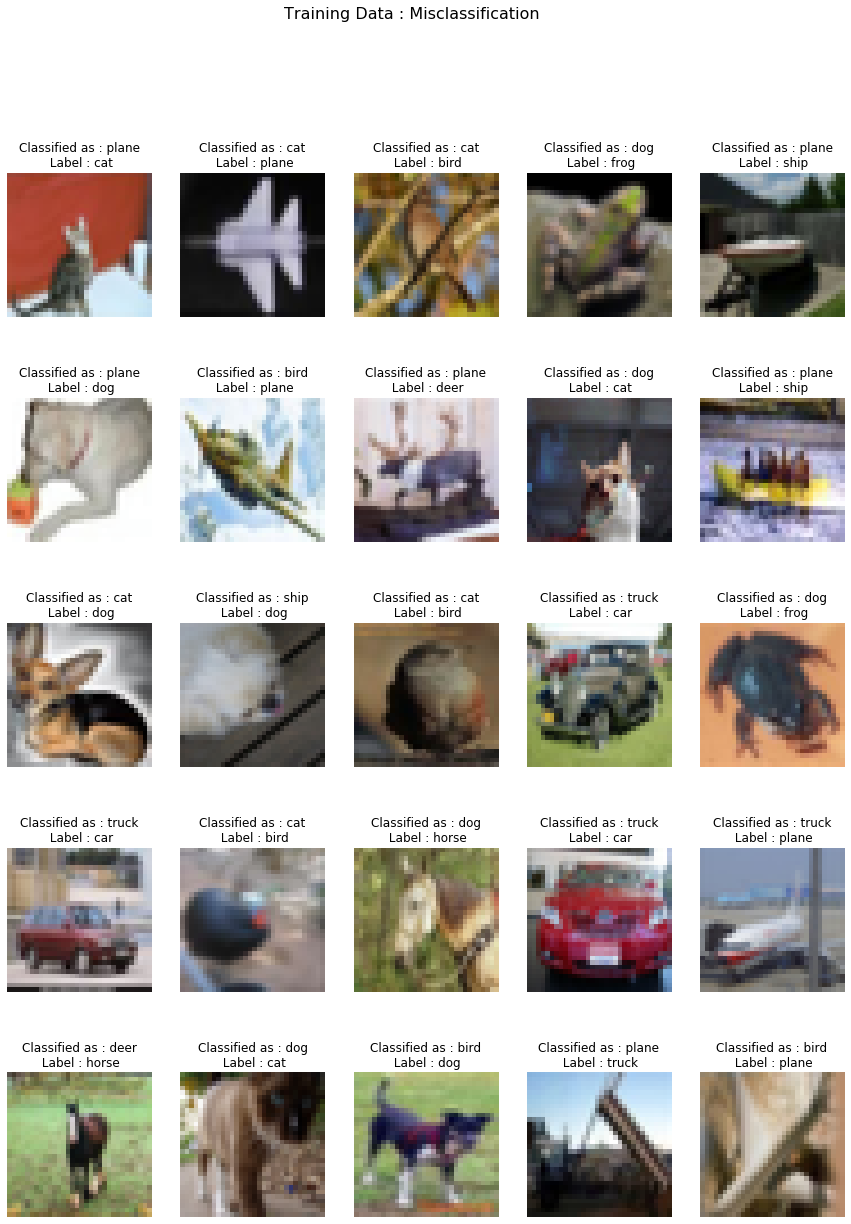

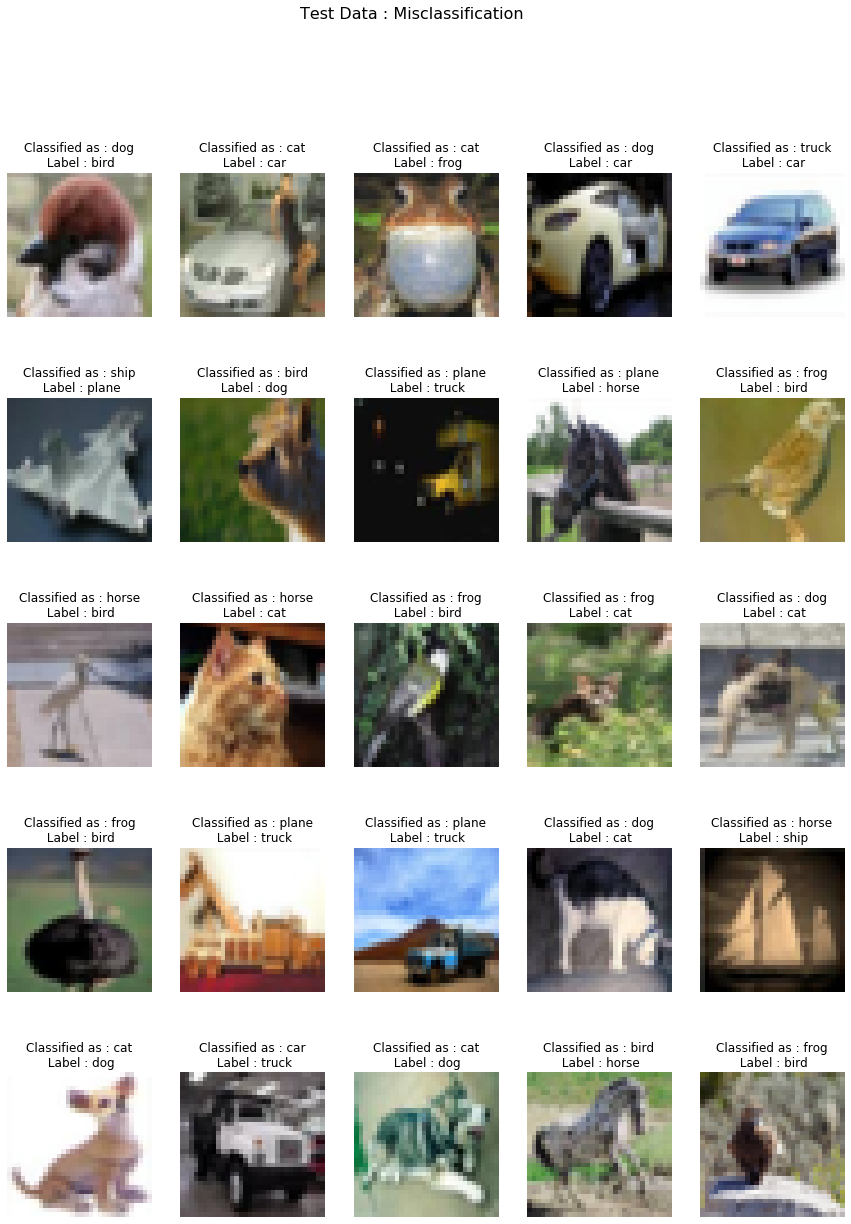

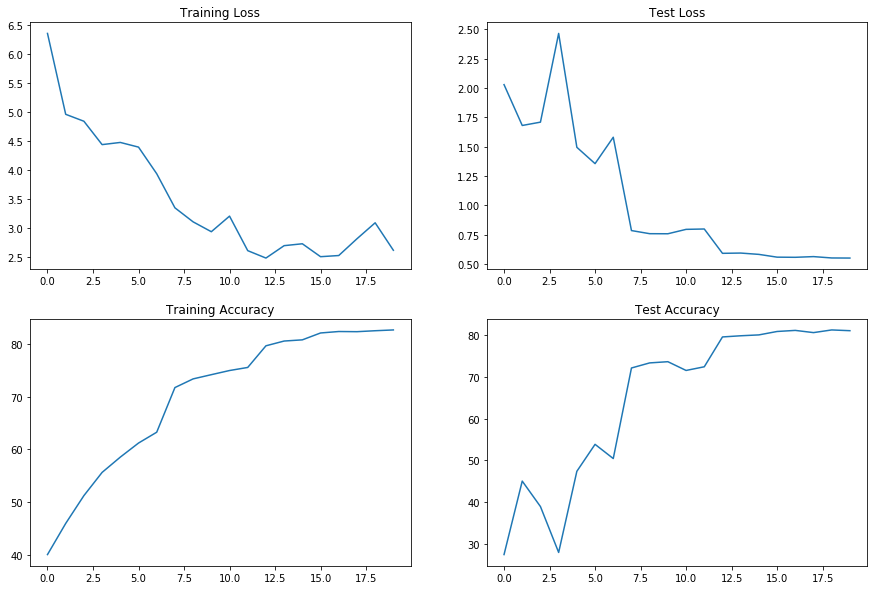

In [0]:
from torch.optim.lr_scheduler import StepLR,MultiStepLR
model = resnet.ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
scheduler = MultiStepLR(optimizer, milestones=[7, 12, 15, 18], gamma=0.1)
EPOCHS = 20
train_losses_L1 = []
train_acc_L1 = []
test_losses_L1 = []
test_acc_L1 = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    tr_acc,tr_losses = trainModel.train(model, device, train_loader, optimizer, epoch,'L1', True, EPOCHS-1)
    train_losses_L1.append(tr_losses)
    train_acc_L1.append(tr_acc)
    scheduler.step()
    ts_acc,ts_loss = testModel.test(model, device, test_loader,epoch,'L1',True, EPOCHS-1)
    test_losses_L1.append(ts_loss)
    test_acc_L1.append(ts_acc)    

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses_L1)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc_L1)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses_L1)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc_L1)
axs[1, 1].set_title("Test Accuracy")

## 6.3 Model with - L2 Regularization

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 0


/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-RESNET/Resnet.py:89: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=2.4709036350250244 Batch_id=0 Accuracy=4.69:   0%|          | 0/782 [00:00<?, ?it/s]/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-RESNET/trainModel.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device).clone().detach().requires_grad_(True)
Loss=0.7511558532714844 Batch_id=781 Accuracy=54.12: 100%|██████████| 782/782 [01:03<00:00, 12.35it/s]
/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-RESNET/testModel.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clon


Test set: Average loss: 1.0687, Accuracy: 6366/10000 (63.66%)

EPOCH: 1


Loss=0.5615056157112122 Batch_id=781 Accuracy=73.49: 100%|██████████| 782/782 [01:03<00:00, 12.40it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7560, Accuracy: 7395/10000 (73.95%)

EPOCH: 2


Loss=1.3121497631072998 Batch_id=781 Accuracy=79.81: 100%|██████████| 782/782 [01:03<00:00, 12.37it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7186, Accuracy: 7590/10000 (75.90%)

EPOCH: 3


Loss=0.3256760835647583 Batch_id=781 Accuracy=83.25: 100%|██████████| 782/782 [01:03<00:00, 12.35it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6343, Accuracy: 7813/10000 (78.13%)

EPOCH: 4


Loss=0.461668461561203 Batch_id=781 Accuracy=85.64: 100%|██████████| 782/782 [01:03<00:00, 12.35it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6447, Accuracy: 7867/10000 (78.67%)

EPOCH: 5


Loss=0.9993773102760315 Batch_id=781 Accuracy=87.39: 100%|██████████| 782/782 [01:03<00:00, 12.36it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5642, Accuracy: 8128/10000 (81.28%)

EPOCH: 6


Loss=0.2790554165840149 Batch_id=781 Accuracy=88.82: 100%|██████████| 782/782 [01:02<00:00, 12.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4855, Accuracy: 8347/10000 (83.47%)

EPOCH: 7


Loss=0.28222525119781494 Batch_id=781 Accuracy=94.41: 100%|██████████| 782/782 [01:03<00:00, 12.39it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3474, Accuracy: 8823/10000 (88.23%)

EPOCH: 8


Loss=0.13593870401382446 Batch_id=781 Accuracy=95.87: 100%|██████████| 782/782 [01:03<00:00, 12.35it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3412, Accuracy: 8858/10000 (88.58%)

EPOCH: 9


Loss=0.0203363299369812 Batch_id=781 Accuracy=96.72: 100%|██████████| 782/782 [01:03<00:00, 12.39it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3414, Accuracy: 8859/10000 (88.59%)

EPOCH: 10


Loss=0.02732163667678833 Batch_id=781 Accuracy=97.36: 100%|██████████| 782/782 [01:03<00:00, 12.36it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3478, Accuracy: 8846/10000 (88.46%)

EPOCH: 11


Loss=0.2226312756538391 Batch_id=781 Accuracy=97.91: 100%|██████████| 782/782 [01:03<00:00, 12.33it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3445, Accuracy: 8875/10000 (88.75%)

EPOCH: 12


Loss=0.03307843208312988 Batch_id=781 Accuracy=98.66: 100%|██████████| 782/782 [01:03<00:00, 12.40it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3427, Accuracy: 8874/10000 (88.74%)

EPOCH: 13


Loss=0.1731603741645813 Batch_id=781 Accuracy=98.78: 100%|██████████| 782/782 [01:02<00:00, 12.42it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3439, Accuracy: 8893/10000 (88.93%)

EPOCH: 14


Loss=0.20637990534305573 Batch_id=781 Accuracy=98.82: 100%|██████████| 782/782 [01:03<00:00, 12.33it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3433, Accuracy: 8891/10000 (88.91%)

EPOCH: 15


Loss=0.08086490631103516 Batch_id=781 Accuracy=98.83: 100%|██████████| 782/782 [01:03<00:00, 12.34it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3455, Accuracy: 8867/10000 (88.67%)

EPOCH: 16


Loss=0.3157631754875183 Batch_id=781 Accuracy=98.82: 100%|██████████| 782/782 [01:03<00:00, 12.30it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3453, Accuracy: 8877/10000 (88.77%)

EPOCH: 17


Loss=0.04656630754470825 Batch_id=781 Accuracy=98.89: 100%|██████████| 782/782 [01:03<00:00, 12.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3457, Accuracy: 8866/10000 (88.66%)

EPOCH: 18


Loss=0.03379791975021362 Batch_id=781 Accuracy=98.85: 100%|██████████| 782/782 [01:03<00:00, 12.35it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3455, Accuracy: 8883/10000 (88.83%)

EPOCH: 19


Loss=0.02556547522544861 Batch_id=781 Accuracy=98.85: 100%|██████████| 782/782 [01:03<00:00, 12.36it/s]



Test set: Average loss: 0.3440, Accuracy: 8870/10000 (88.70%)



Text(0.5, 1.0, 'Test Accuracy')

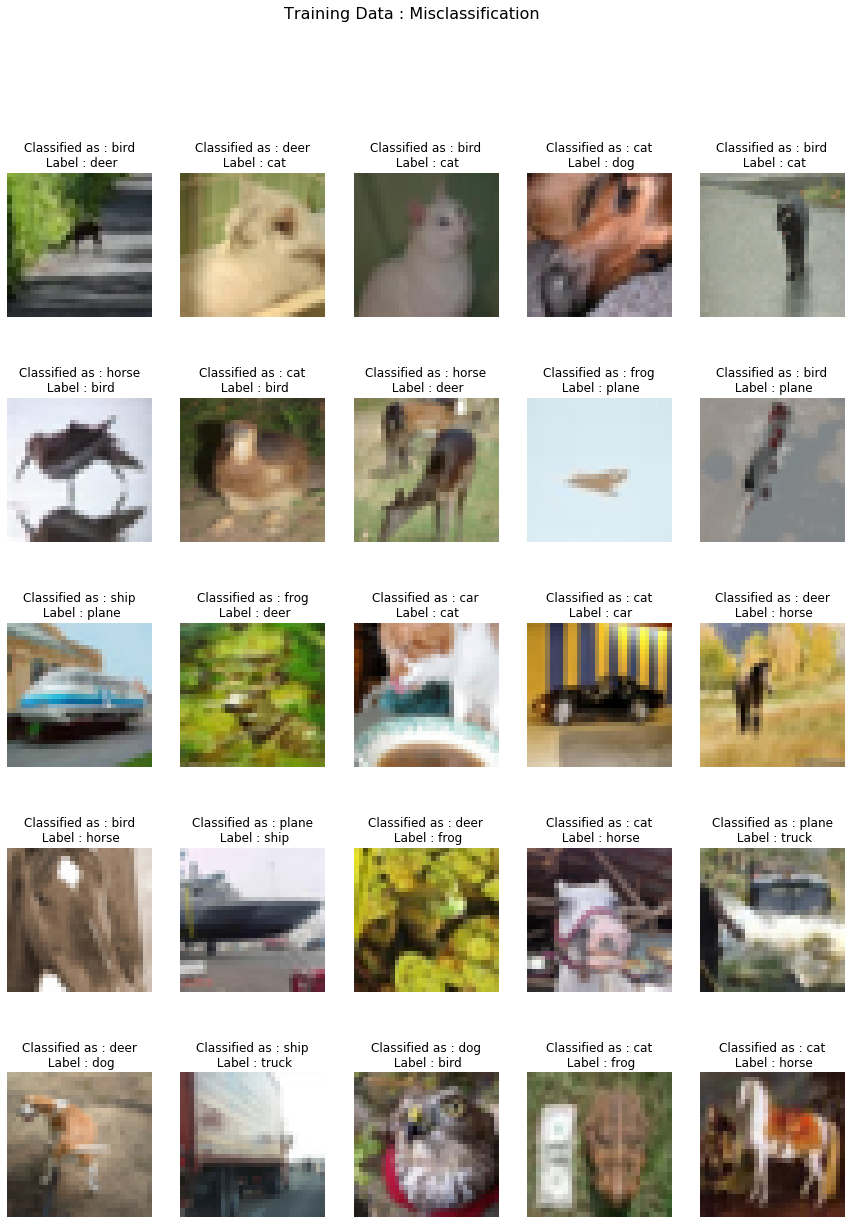

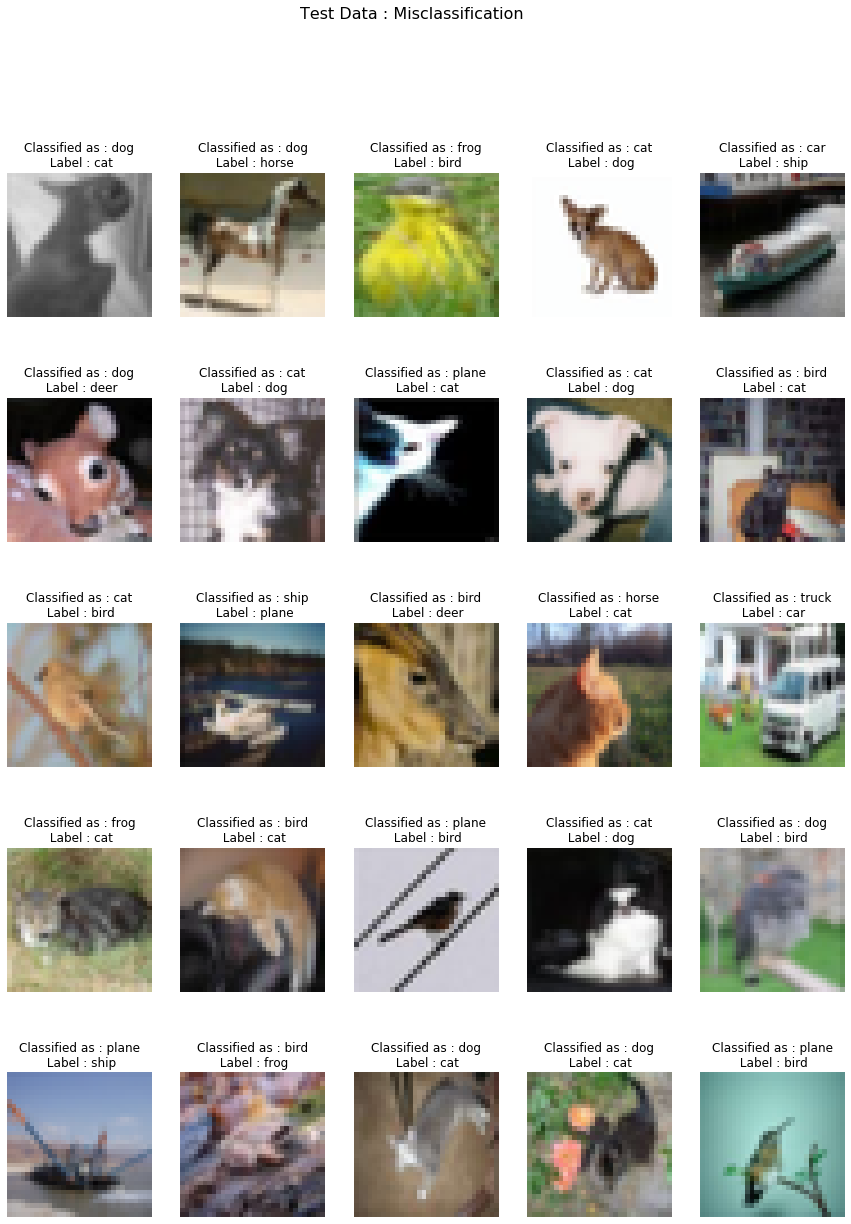

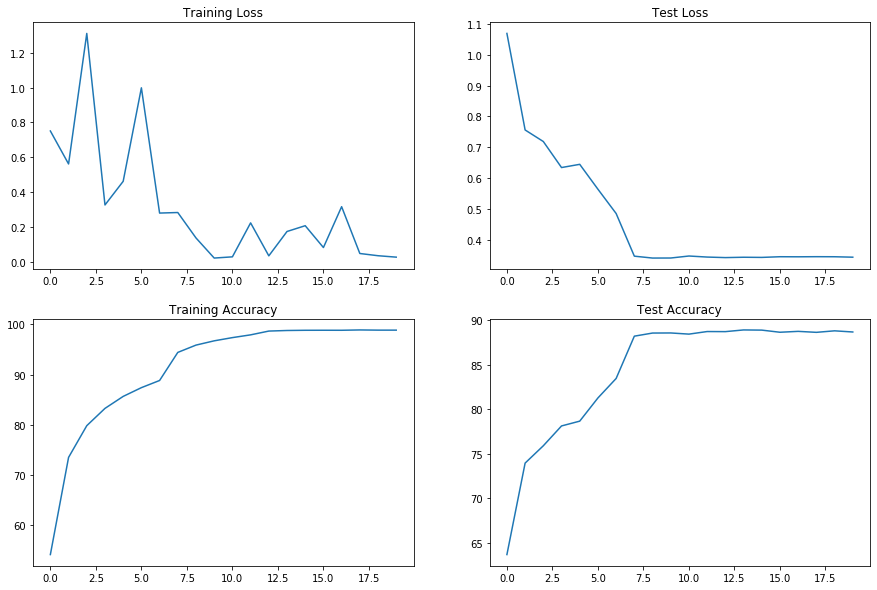

In [0]:
from torch.optim.lr_scheduler import StepLR,MultiStepLR
model = resnet.ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9,weight_decay = 0.001)
scheduler = MultiStepLR(optimizer, milestones=[7, 12, 15, 18], gamma=0.1)
EPOCHS = 20
train_losses_L2 = []
train_acc_L2 = []
test_losses_L2 = []
test_acc_L2 = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    tr_acc,tr_losses = trainModel.train(model, device, train_loader, optimizer, epoch,'L2', True, EPOCHS-1)
    train_losses_L2.append(tr_losses)
    train_acc_L2.append(tr_acc)
    scheduler.step()
    ts_acc,ts_loss = testModel.test(model, device, test_loader,epoch,'L2',True, EPOCHS-1)
    test_losses_L2.append(ts_loss)
    test_acc_L2.append(ts_acc)    

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses_L2)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc_L2)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses_L2)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc_L2)
axs[1, 1].set_title("Test Accuracy")

## 6.4 Model with - L1 & L2 Regularization

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 0


/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-RESNET/Resnet.py:89: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=57.14134979248047 Batch_id=0 Accuracy=9.38:   0%|          | 0/782 [00:00<?, ?it/s]/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-RESNET/trainModel.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device).clone().detach().requires_grad_(True)
Loss=5.575969696044922 Batch_id=781 Accuracy=40.77: 100%|██████████| 782/782 [01:06<00:00, 11.81it/s]
/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-RESNET/testModel.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone(


Test set: Average loss: 1.5608, Accuracy: 3839/10000 (38.39%)

EPOCH: 1


Loss=5.17478084564209 Batch_id=781 Accuracy=45.74: 100%|██████████| 782/782 [01:05<00:00, 11.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 4.5383, Accuracy: 1797/10000 (17.97%)

EPOCH: 2


Loss=4.983137607574463 Batch_id=781 Accuracy=52.04: 100%|██████████| 782/782 [01:06<00:00, 11.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 2.8822, Accuracy: 1979/10000 (19.79%)

EPOCH: 3


Loss=3.804551601409912 Batch_id=781 Accuracy=55.95: 100%|██████████| 782/782 [01:06<00:00, 11.82it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.5585, Accuracy: 4539/10000 (45.39%)

EPOCH: 4


Loss=3.914109706878662 Batch_id=781 Accuracy=58.96: 100%|██████████| 782/782 [01:06<00:00, 11.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.3000, Accuracy: 5315/10000 (53.15%)

EPOCH: 5


Loss=3.1437454223632812 Batch_id=781 Accuracy=61.94: 100%|██████████| 782/782 [01:06<00:00, 11.82it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.3199, Accuracy: 5429/10000 (54.29%)

EPOCH: 6


Loss=3.733961582183838 Batch_id=781 Accuracy=64.69: 100%|██████████| 782/782 [01:06<00:00, 11.80it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.1982, Accuracy: 5807/10000 (58.07%)

EPOCH: 7


Loss=1.9125792980194092 Batch_id=781 Accuracy=73.00: 100%|██████████| 782/782 [01:06<00:00, 11.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7472, Accuracy: 7361/10000 (73.61%)

EPOCH: 8


Loss=2.2030324935913086 Batch_id=781 Accuracy=74.91: 100%|██████████| 782/782 [01:06<00:00, 11.82it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7510, Accuracy: 7409/10000 (74.09%)

EPOCH: 9


Loss=2.0885283946990967 Batch_id=781 Accuracy=76.08: 100%|██████████| 782/782 [01:05<00:00, 11.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7419, Accuracy: 7386/10000 (73.86%)

EPOCH: 10


Loss=1.7817834615707397 Batch_id=781 Accuracy=76.64: 100%|██████████| 782/782 [01:06<00:00, 11.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6933, Accuracy: 7595/10000 (75.95%)

EPOCH: 11


Loss=1.6729708909988403 Batch_id=781 Accuracy=77.00: 100%|██████████| 782/782 [01:06<00:00, 11.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7033, Accuracy: 7583/10000 (75.83%)

EPOCH: 12


Loss=1.6287072896957397 Batch_id=781 Accuracy=80.60: 100%|██████████| 782/782 [01:06<00:00, 11.83it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5748, Accuracy: 8015/10000 (80.15%)

EPOCH: 13


Loss=1.6475610733032227 Batch_id=781 Accuracy=81.22: 100%|██████████| 782/782 [01:06<00:00, 11.80it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5627, Accuracy: 8076/10000 (80.76%)

EPOCH: 14


Loss=1.7099807262420654 Batch_id=781 Accuracy=81.69: 100%|██████████| 782/782 [01:06<00:00, 11.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5561, Accuracy: 8084/10000 (80.84%)

EPOCH: 15


Loss=2.1651039123535156 Batch_id=781 Accuracy=82.26: 100%|██████████| 782/782 [01:05<00:00, 11.87it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5485, Accuracy: 8136/10000 (81.36%)

EPOCH: 16


Loss=1.668921947479248 Batch_id=781 Accuracy=82.32: 100%|██████████| 782/782 [01:06<00:00, 11.83it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5472, Accuracy: 8129/10000 (81.29%)

EPOCH: 17


Loss=1.860606074333191 Batch_id=781 Accuracy=82.52: 100%|██████████| 782/782 [01:06<00:00, 11.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5501, Accuracy: 8106/10000 (81.06%)

EPOCH: 18


Loss=2.134535789489746 Batch_id=781 Accuracy=82.63: 100%|██████████| 782/782 [01:06<00:00, 11.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5456, Accuracy: 8145/10000 (81.45%)

EPOCH: 19


Loss=1.5587228536605835 Batch_id=781 Accuracy=82.60: 100%|██████████| 782/782 [01:06<00:00, 11.82it/s]



Test set: Average loss: 0.5506, Accuracy: 8131/10000 (81.31%)



Text(0.5, 1.0, 'Test Accuracy')

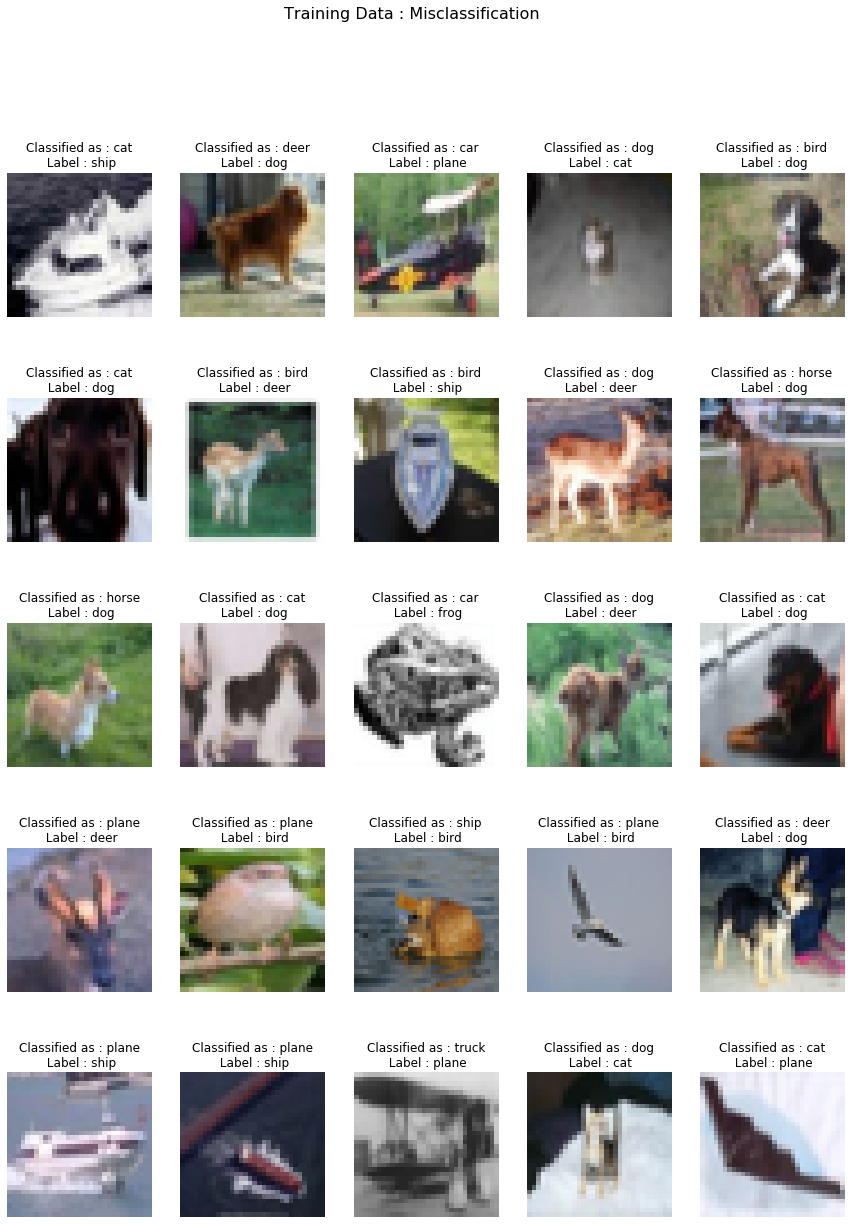

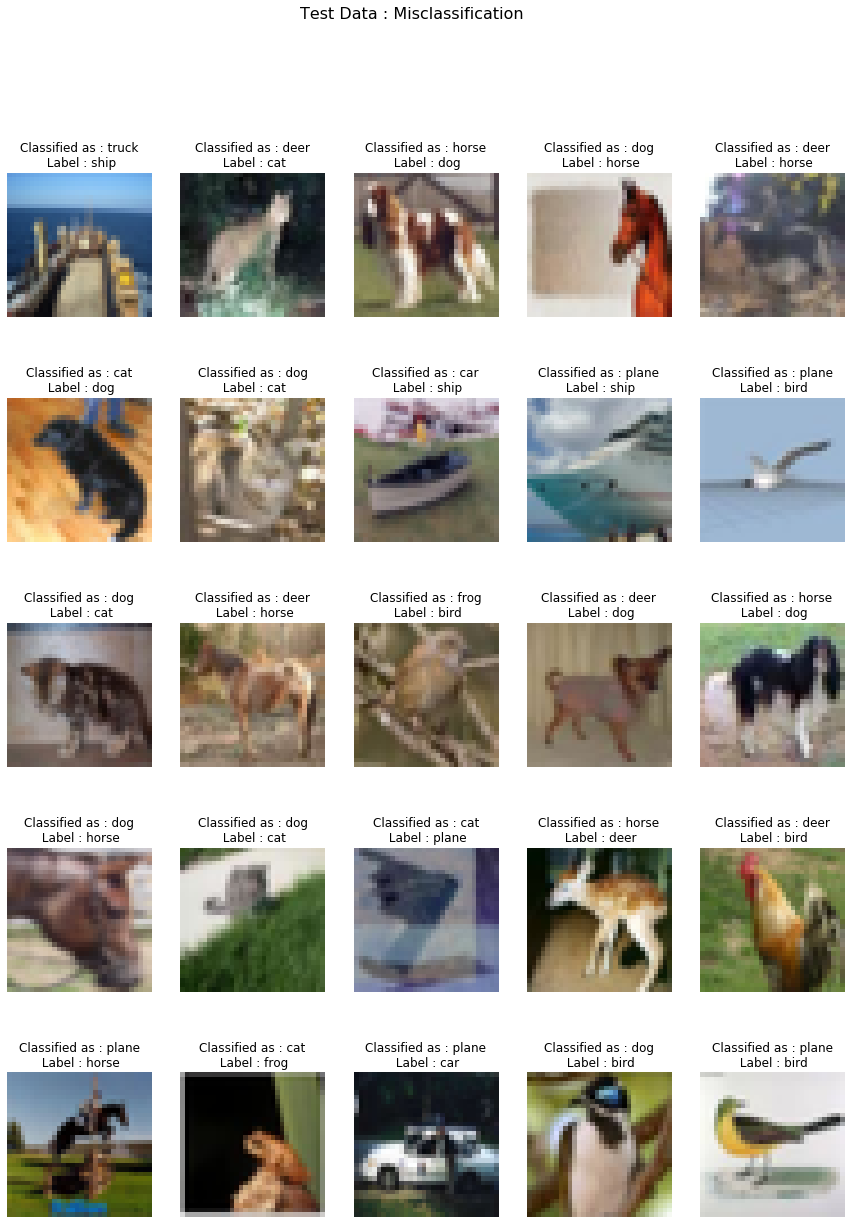

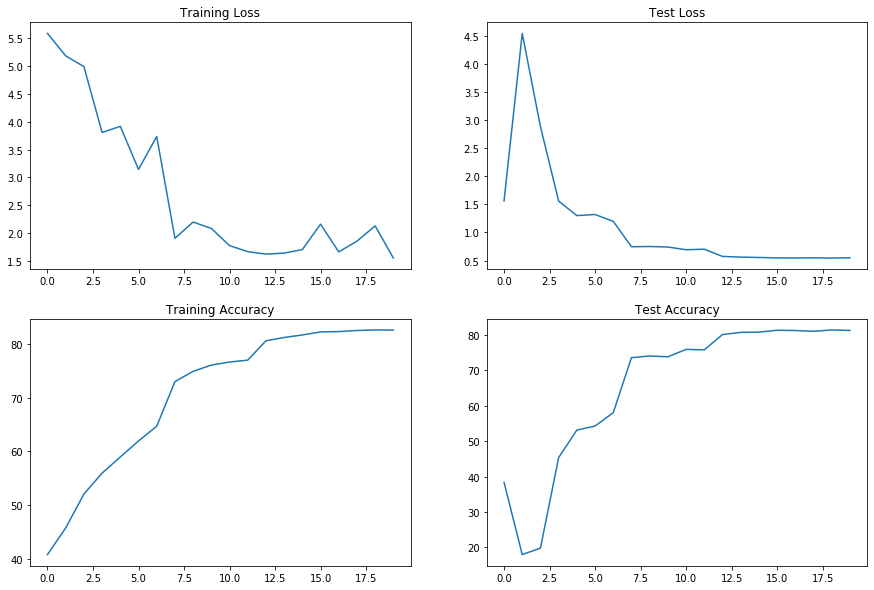

In [0]:
from torch.optim.lr_scheduler import StepLR,MultiStepLR
model = resnet.ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9,weight_decay = 0.001)
scheduler = MultiStepLR(optimizer, milestones=[7, 12, 15, 18], gamma=0.1)
EPOCHS = 20
train_losses_L1_L2 = []
train_acc_L1_L2 = []
test_losses_L1_L2 = []
test_acc_L1_L2 = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    tr_acc,tr_losses = trainModel.train(model, device, train_loader, optimizer, epoch,'ElastiNet', True, EPOCHS-1)
    train_losses_L1_L2.append(tr_losses)
    train_acc_L1_L2.append(tr_acc)
    scheduler.step()
    ts_acc,ts_loss = testModel.test(model, device, test_loader,epoch,'ElastiNet',True, EPOCHS-1)
    test_losses_L1_L2.append(ts_loss)
    test_acc_L1_L2.append(ts_acc)    

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses_L1_L2)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc_L1_L2)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses_L1_L2)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc_L1_L2)
axs[1, 1].set_title("Test Accuracy")

# 7. Plot the graphs for comparison

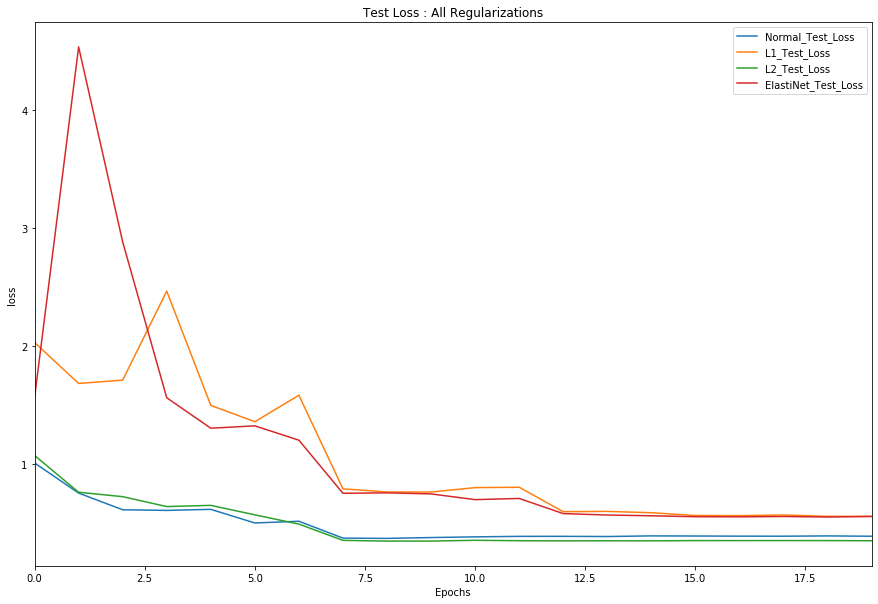

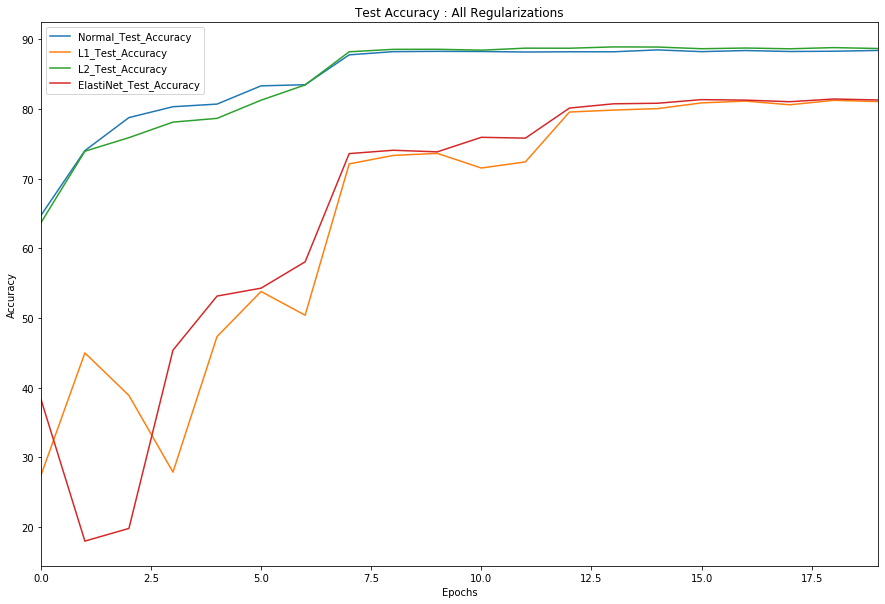

In [0]:
import pandas as pd
Testing_all_loss = pd.DataFrame({'Normal_Test_Loss' : np.array(test_losses).reshape(-1),
                                 'L1_Test_Loss' : np.array(test_losses_L1).reshape(-1),
                                 'L2_Test_Loss' : np.array(test_losses_L2).reshape(-1),
                                 'ElastiNet_Test_Loss' : np.array(test_losses_L1_L2).reshape(-1)
                                 })

Testing_all_accuracy = pd.DataFrame({'Normal_Test_Accuracy' : np.array(test_acc).reshape(-1),
                                     'L1_Test_Accuracy' : np.array(test_acc_L1).reshape(-1),
                                     'L2_Test_Accuracy' : np.array(test_acc_L2).reshape(-1),
                                     'ElastiNet_Test_Accuracy' : np.array(test_acc_L1_L2).reshape(-1)
                                     })

fig1 = Testing_all_loss.plot(figsize=(15,10),kind = 'line', title = "Test Loss : All Regularizations")
fig1.set_xlabel("Epochs")
fig1.set_ylabel("loss")
fig2 = Testing_all_accuracy.plot(figsize=(15,10),kind = 'line',title = "Test Accuracy : All Regularizations")
fig2.set_xlabel("Epochs")
fig2.set_ylabel("Accuracy")

fig1
fig2